<a href="https://colab.research.google.com/github/Alexeanred/DEMO/blob/main/S1_ASSIGNMENT_NguyenDuyTien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link tóm tắt bài học: https://www.notion.so/Session-1-Features-Embedding-Coordinates-18e7a6b7136f4393be401fc918b9e43f

<h1><center>

<img src="https://i.imgur.com/LSeMSbh.jpg" alt="logo" width="700" height="300">

<h1>MACHINE LEARNING FOR AI</h1>
<h4>SESSION 1 - REPRESENTATION & PCA</h4>
<h4>ASSIGNMENT</h4>


**&copy; 2022 LeHongPhong-COTAI. Internal Use Only.**

</center></h1>


# 1 Coding Practice


## 1.1: Ôn tập thuật toán K-Neareast Neighbors

Thuật toán **KNN** cho rằng những dữ liệu tương tự nhau sẽ tồn tại gần nhau trong một không gian, từ đó công việc của chúng ta là sẽ tìm **k điểm gần với dữ liệu cần kiểm tra nhất**.

Các bước cơ bản của thuật toán KNN:
- Tính khoảng cách từ điểm dữ liệu cần phân loại với toàn bộ dữ liệu đã có.
  - Ta có thể dùng khoảng cách thẳng (Euclidean)
  ![](https://i.imgur.com/HfdCIR4.png)

  - $$d(A,B) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} = \|AB\|$$

  - $$\text{In general: } d(A,B) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + \cdots + (z_1 - z_2)^2}$$
- Chọn ra **k** điểm dữ liệu gần với dữ liệu cần kiểm tra nhất
- Dựa vào nhãn (label) của **k** điểm dữ liệu đó để xác định nhãn cho điểm dữ liệu cần tìm.

**Ảnh GIF mô tả thuật toán K-NN khi chọn k=5**
![](https://i.imgur.com/Yjdbotr.gif)



### Tạo bộ dữ liệu

Chạy 2 cell bên dưới để khởi tạo 1 Dataset giả (Hay còn được gọi là Toy Dataset, thường được dùng để minh họa cho các thuật toán Machine Learning)

In [ ]:
import math
import numpy as np

def generate_data():
  np.random.seed(42)
  N = 100 # number of points per class
  d0 = 2 # dimensionality
  C = 2 # number of classes
  x = np.zeros((d0, N*C)) # data matrix (each row = single example)
  y = np.zeros(N*C, dtype='uint8') # class labels

  for j in range(C):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    x[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j
  x = x.T
  return x, y

In [ ]:
x, y = generate_data()
print('Shape of x',x.shape)
print('Shape of y',y.shape)
print('Classes:', np.unique(y))

Shape of x (200, 2)
Shape of y (200,)
Classes: [0 1]


In [ ]:
import pandas as pd
x_df = pd.DataFrame(x)
y_df = pd.Series(y)
x_df.head(5)

,0,1
0,0.000000,0.000000
1,0.000129,0.010100
2,0.004218,0.019757
3,0.012517,0.027597
4,0.004628,0.040138


In [ ]:
y_df.head(5)

0    0
1    0
2    0
3    0
4    0
dtype: uint8

Quan sát kết quả in ra bên trên, ta hiểu rằng:
- Ta có 200 điểm dữ liệu
- x có 2 đặc trưng (feature)
- Từng điểm dữ liệu sẽ được gán với 1 trong 2 nhãn là **0 hoặc 1**


### Visualize

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


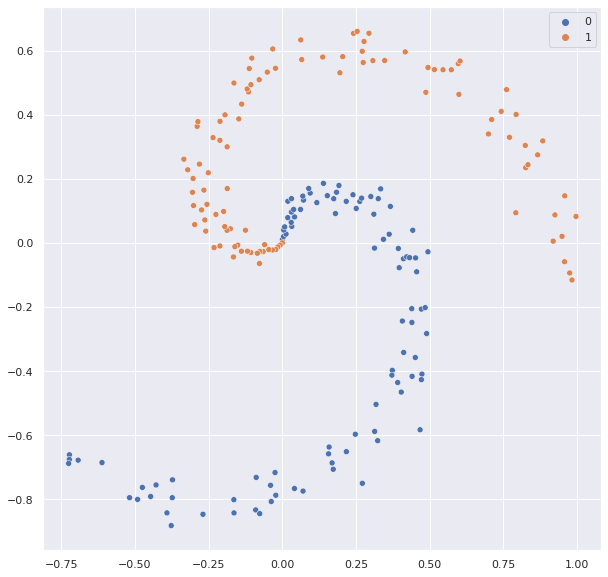

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(10,10))
sns.scatterplot(x[:,0], x[:,1], hue=y) #phân loại bằng y và trục x,y là 2 dữ liệu của x
plt.show()

### Mô tả bài toán

Nhiệm vụ của chúng ta là:
- Tạo và huấn luyện mô hình K-NN trên bộ dữ liệu trên
- Phân loại (Xác định nhãn) (label / class) cho 2 điểm dữ liệu mới là:
  - ``x1 = [0, -0.2]``
  - ``x2 = [0.25, 0.3]``



In [ ]:
x1 = np.array([[0, -0.2]])
x2 = np.array([[0.25, 0.3]])

Ta sẽ vẽ lại bộ dữ liệu và 2 điểm dữ liệu mới cần phân loại

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


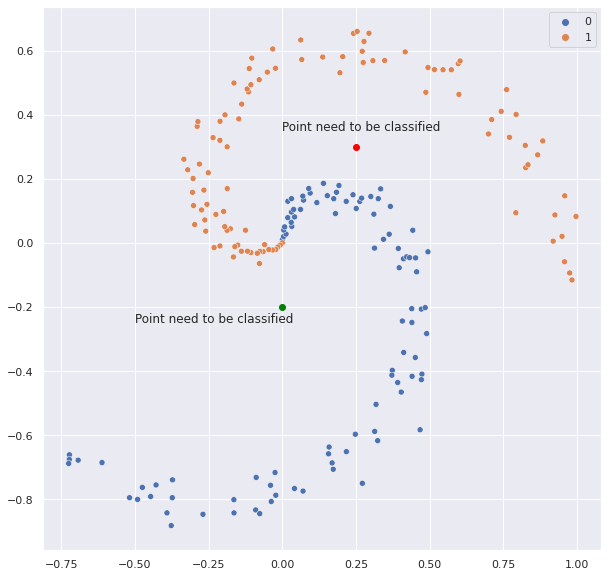

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.scatterplot(x[:,0], x[:,1], hue=y)
plt.scatter(x1[:,0], x1[:,1], c='green')
plt.text(-0.5, -0.25, 'Point need to be classified')
plt.scatter(x2[:,0], x2[:,1], c='red')
plt.text(0, 0.35, 'Point need to be classified')
plt.show()

### Thực hiện

#### Bước 1: Import và khởi tạo mô hình K-NN từ thư viện sklearn

Đoạn code bên dưới sẽ khởi tạo mô hình K-NN cho bài toán phân loại, nên được gọi là ``KNeighborsClassifier``.

Các tham số của ``KNeighborsClassifier`` gồm:
- ``n_neighbors``: số **k**
- ``algorithm``: cách áp dụng **K-NN**, thuật toán **K-NN** bao gồm rất nhiều bản thể khác nhau, thứ chúng ta được học là cơ bản nhất: **Tính khoảng cách từ điểm hiện tại đến toàn bộ dữ liệu và chọn ra k điểm gần nhất**, tương ứng với tham số ``algorithm='brute'``
- ``metric``: Cách tính khoảng cách, như chúng ta được học trên lớp là dùng khoảng cách **euclidean**. Ngoài ra còn có các khoảng cách như **manhattan, minkowski** các bạn có thể tự tìm hiểu thêm.

Ngoài các tham số cơ bản trên, mô hình **K-NN** của thư viện ``sklearn`` còn có rất nhiều tham số khác. Đọc thêm [ở đây](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, algorithm='brute', metric='euclidean')

#### Bước 2: Gọi hàm fit() và truyền vào x, y

In [ ]:
model.fit(x, y)

KNeighborsClassifier(algorithm='brute', metric='euclidean')

#### Bước 3: Gọi hàm score() để đánh giá hiệu năng của mô hình vừa huấn luyện

Đối với mỗi loại bài toán của Machine Learning (Phân loại [Classification] hoặc Dự đoán giá trị [Regression]), sau khi huấn luyện mô hình xong, ta cần 1 công thức / phép thử / metric để đánh giá hiệu năng của mô hình.

Đối với mô hình **K-NN**, hàm score sẽ dùng metric là **accuracy**. Công thức của metric accuracy là
$$Accuracy = \frac{\text{Số mẫu mà mô hình dự đoán đúng}}{\text{Tổng số mẫu}} $$

Ví dụ có 10 mẫu dữ liệu, mô hình dự đoán đúng 9 mẫu thì accuracy sẽ là 90%

In [ ]:
print('Accuracy of K-NN model =',model.score(x, y))

Accuracy of K-NN model = 0.995


#### Bước 4: Gọi hàm predict() để dự đoán giá trị mới

In [ ]:
y1 = model.predict(x1)
y2 = model.predict(x2)
print('x1 belongs to class {}'.format(y1))
print('x2 belongs to class {}'.format(y2))

x1 belongs to class [1]
x2 belongs to class [0]


**Đối với mô hình K-NN, ta còn có thể lấy ra index của k điểm dữ liệu gần nhất so với điểm dữ liệu cần dự đoán**

In [ ]:
x1_nearest = model.kneighbors(x1, return_distance=False)[0]
print('Indices of 5 points in x closest to x1', x1_nearest)
x2_nearest = model.kneighbors(x2, return_distance=False)[0]
print('Indices of 5 points in x closest to x2',x2_nearest)

Indices of 5 points in x closest to x1 [110 103 104 107 105]
Indices of 5 points in x closest to x2 [26 28 37 24 23]


**Vẽ hình minh họa**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


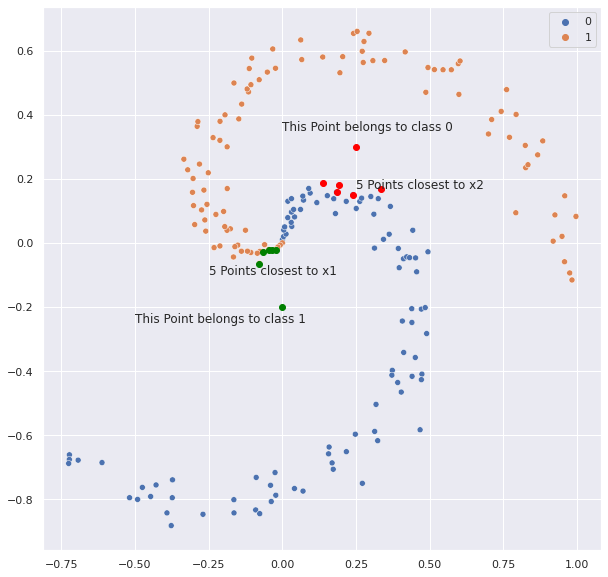

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x[:,0], x[:,1], hue=y)
plt.scatter(x1[:,0], x1[:,1], c='green')
plt.text(-0.5, -0.25, 'This Point belongs to class 1')
plt.scatter(x[x1_nearest][:,0], x[x1_nearest][:,1], c='green')
plt.text(-0.25, -0.1, '5 Points closest to x1')
plt.scatter(x2[:,0], x2[:,1], c='red')
plt.text(0, 0.35, 'This Point belongs to class 0')
plt.scatter(x[x2_nearest][:,0], x[x2_nearest][:,1], c='red')
plt.text(0.25, 0.17, '5 Points closest to x2')
plt.show()

Từ hình vẽ trên, ta thấy rằng:
- 5 điểm gần ``x1`` nhất đều có nhãn là 1, do đó x1 cũng có nhãn là 1
- 5 điểm gần ``x2`` nhất đều có nhãn là 0, do đó x2 cũng có nhãn là 0

### Vẽ decision boundary

Decision Boundary là 1 ranh giới phân chia không gian dữ liệu thành 2 hoặc nhiều nhãn để quyết định các điểm dữ liệu trong không gian đó thuộc về nhãn nào.

Đối với dữ liệu 2 chiều (2 đặc trưng) hoặc 3 chiều (3 đặc trưng), ta có thể vẽ Decision Boundary để hiểu rõ hơn các vùng giá trị trong không gian dữ liệu sẽ thuộc về nhãn nào

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


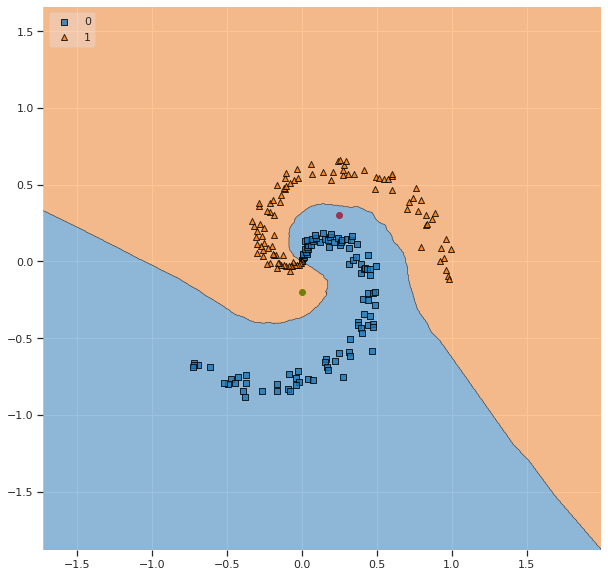

In [ ]:
from mlxtend.plotting import plot_decision_regions

np.random.seed(42)

plt.figure(figsize=(10,10))
plt.scatter(x1[:,0], x1[:,1], c='green')
plt.scatter(x2[:,0], x2[:,1], c='red')
plot_decision_regions(x, y, clf=model, legend=2)

### Phân tích sâu hơn

Kết quả của bài toán trên sẽ thay đổi như thế nào nếu ta chọn số **k** khác ?
Ta sẽ tạo 1 vòng lặp để train và huấn luyện nhiều mô hình **KNN** với các số **k** lần lượt là ``1, 5, 10, 20, 30, 40`` để xem kết quả khác nhau như thế nào.

**Lưu ý** Chạy cell bên dưới sẽ hơi lâu.

In [ ]:
accuracy_list = []
model_list = []
for k in [1,5,10,20,30]:
  model = KNeighborsClassifier(n_neighbors=k, algorithm='brute', metric='euclidean')
  model.fit(x,y)
  accuracy_list.append(model.score(x,y))
  model_list.append(model)


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

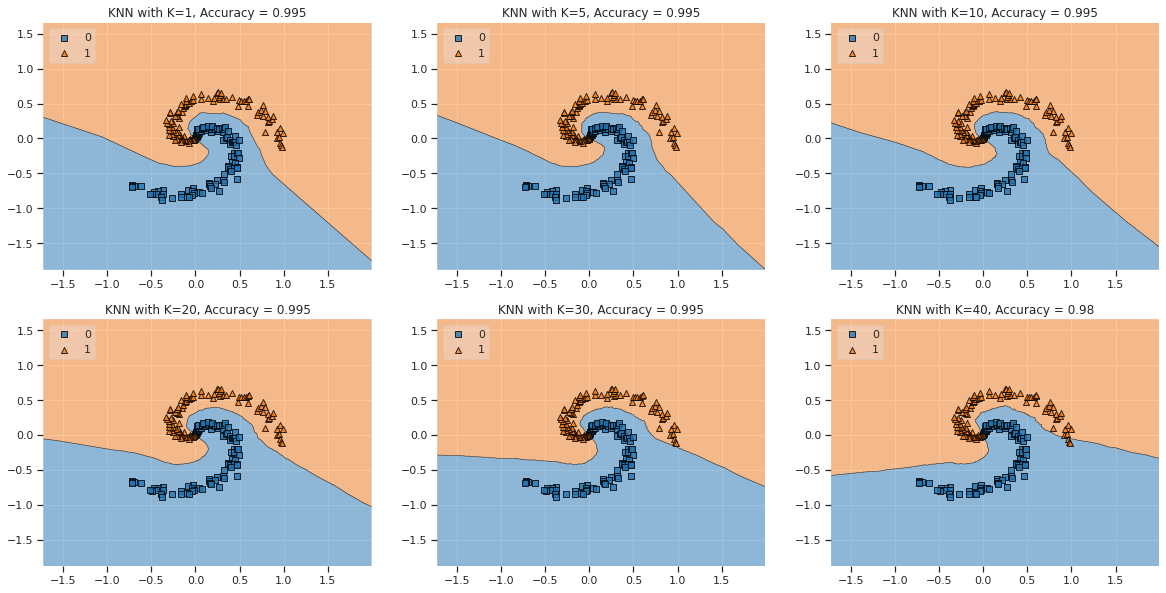

In [ ]:
def run_knn_and_plot_decision_boundary(ax, k):
  model = KNeighborsClassifier(n_neighbors=k, algorithm='brute', metric='euclidean')
  model.fit(x, y)
  plot_decision_regions(x, y, ax=ax, clf=model, legend=2)
  ax.set_title('KNN with K='+ str(k)+', Accuracy = '+str(model.score(x,y)))

fig, axs = plt.subplots(2, 3, figsize=(20,10))
for k, ax in zip([1,5,10,20,30,40], axs.flatten()):
  run_knn_and_plot_decision_boundary(ax, k)
plt.show()


Từ kết quả trên, ta thấy rõ ràng việc chọn **k** có ảnh hưởng lớn đến kết quả (Accuracy) của mô hình **KNN**.

Vậy làm sao để chọn **k** cho tốt? Cách đơn giản nhất ở thời điểm hiện tại là tạo 1 vòng lặp để thử nhiều số **k** khác nhau và chọn ra **k** mà tại đó mô hình cho ra Accuracy cao nhất.

## 1.2: Thực hành thuật thoán K-Nearest Neighbors

### Đề bài

Tại trường đại học CoTAI, để đậu môn học Machine Learning của giáo sư X, sinh viên cần phải thi 2 bài thi cuối khóa (Điếm tối đa của mỗi bài thi là 100). Chỉ tiêu đậu do giáo sư X đưa ra là:
- Điểm thi từng bài phải trên trung bình ($>= 50$)
- Hoặc tổng điểm của 2 bài thi phải $>= 120$

Học kì mới bắt đầu và bỗng nhiên giáo sư X quên mất chỉ tiêu đậu mà ông đã đặt ra. Thứ còn sót lại chỉ là điểm thi và kết quả của 50 học sinh khóa trước. Hãy thử xây dựng mô hình **K-NN** để tự động phân loại học sinh đậu / rớt giúp giáo sư X nhé.


Bộ dữ liệu ta sẽ thực hành ở bài này gồm có 2 đặc trưng:
- Điểm thi môn 1
- Điểm thi môn 2

Và có 2 nhãn là đậu hoặc rớt.

Nhiệm vụ của chúng ta là tạo và huấn luyện mô hình **K-NN** trên bộ dữ liệu trên để tự động phân loại kết quả thi là đậu hay rớt

### Tạo dữ liệu

Chạy cell bên dưới để tạo dữ liệu ảo

In [ ]:
import numpy as np 
import pandas as pd

def create_dataset():
  np.random.seed(42)
  x_1 = np.random.randint(10, 101, size=(50))
  x_2 = np.random.randint(10, 101, size=(50))

  y = []
  for i,j in zip(x_1, x_2):
    if i >= 50 and j >= 50:
      y.append(1)
    elif i + j >= 120:
      y.append(1)
    else:
      y.append(0)
  y = np.array(y)

  data = pd.DataFrame(columns=['Exam_1', 'Exam_2', 'pass'])
  data['Exam_1'] = x_1
  data['Exam_2'] = x_2
  data['pass'] = y
  return data

data = create_dataset()
x = data[['Exam_1', 'Exam_2']].values
y = data['pass'].values
print('Shape of x',x.shape)
print('Shape of y',y.shape)
print('Classes:', np.unique(y))

Shape of x (50, 2)
Shape of y (50,)
Classes: [0 1]


Quan sát kết quả in ra bên trên, ta hiểu rằng:
- Ta có 50 điểm dữ liệu
- x có 2 đặc trưng (feature)
- Từng điểm dữ liệu sẽ được gán với 1 trong 2 nhãn là **0 hoặc 1**

### Vẽ đồ thị

Hình vẽ bên dưới cho biết ta có 2 nhãn là **0 hoặc 1** và **mỗi nhãn có 25 mẫu**

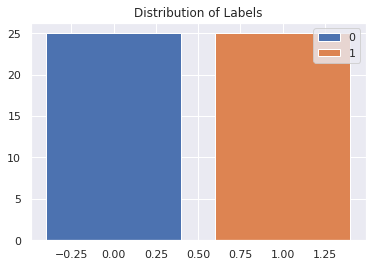

In [ ]:
import matplotlib.pyplot as plt # for drawing chart

# draw the distribution of label
# np.where(condition) return all indices matched the condition
# np.where(condition, value if true, value if false) replace all values 
# matched the condition
plt.bar(0,len(np.where(y==0)[0]))
plt.bar(1,len(np.where(y==1)[0]))
plt.title('Distribution of Labels')
plt.legend([0,1])
plt.show()

Do dữ liệu thuộc không gian 2 chiều, ta còn có thể vẽ đồ thị để xem hình dáng của dữ liệu

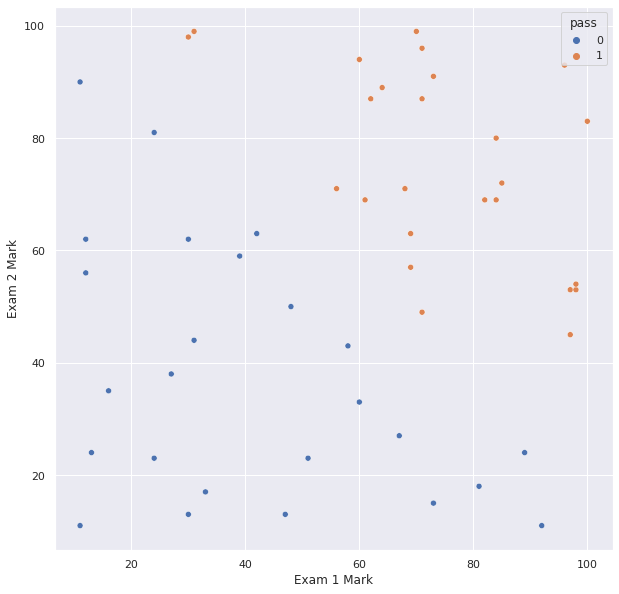

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(10,10))
sns.scatterplot(data=data, x='Exam_1', y ='Exam_2', hue='pass')
plt.xlabel('Exam 1 Mark')
plt.ylabel('Exam 2 Mark')
plt.show()

### Thực hiện



##### TODO 1

- Tạo và huấn luyện mô hình **K-NN** để dự báo học sinh đậu / rớt, các bước thực hiện
  - Import thuật toán K-NN từ thư viện sklearn
  - Tạo mô hình
  - Gọi hàm ``fit()`` để huấn luyện
  - Gọi hàm ``score()`` để biết Accuracy của mô hình là bao nhiêu, cố gắng đạt được Accuracy = 100% nhé
  - Gọi hàm ``predict()`` để dự báo kết quả đậu rớt cho 2 học sinh mới
    - Học sinh 1: Điểm bài 1: 40, Điểm bài 2: 40
    - Học sinh 2: Điểm bài 1: 90, Điểm bài 2: 30

In [ ]:
student_1 = np.array([[40, 40]])
student_2 = np.array([[90, 30]])

In [ ]:
# YOUR SOLUTION
lst = list()
from sklearn.neighbors import KNeighborsClassifier
def checkAccuracy(n):
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(x,y)
  return model.score(x,y)
for i in [1,3,5,7,9,40,15]:
  print(f"Với n={i} thì accuracy bằng {checkAccuracy(i)}")

Với n=1 thì accuracy bằng 1.0
Với n=3 thì accuracy bằng 1.0
Với n=5 thì accuracy bằng 1.0
Với n=7 thì accuracy bằng 1.0
Với n=9 thì accuracy bằng 1.0
Với n=40 thì accuracy bằng 0.98
Với n=15 thì accuracy bằng 1.0


In [ ]:
#Huấn luyện lại
model = KNeighborsClassifier(n_neighbors=15, algorithm='brute', metric='euclidean')
model.fit(x,y)
print(f"Class của student_1 là {model.predict(student_1)[0]}. Nghĩa là học sinh đó rớt")

Class của student_1 là 0. Nghĩa là học sinh đó rớt


In [ ]:
print(f"Class của student_2 là {model.predict(student_2)[0]}. Nghĩa là học sinh đó đậu")

Class của student_2 là 1. Nghĩa là học sinh đó đậu


In [ ]:
#Vậy n tốt là n=15.

### Decision Boundary

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


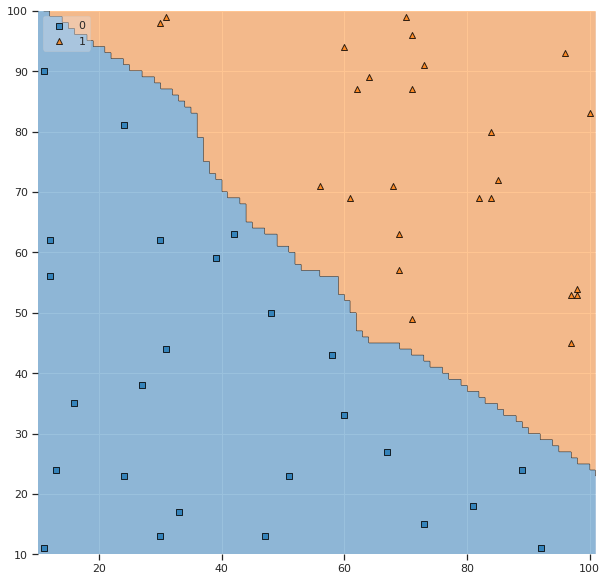

In [ ]:
from mlxtend.plotting import plot_decision_regions

np.random.seed(42)
plt.figure(figsize=(10,10))
plot_decision_regions(x, y, clf=model, legend=2)

### Nhận xét

Ta thấy rằng, tuy độ chính xác là 100%, mô hình vẫn dự báo  sai kết quả của học sinh thứ 2 (Tổng điểm là 120).

Lý do là trong dữ liệu huấn luyện, không có mẫu dữ liệu nào tương tự với dữ liệu của học sinh thứ 2 cả (các em có thể tự vẽ đồ thị để xem nhé)  mô hình K-NN chưa thể đưa ra dự đoán tốt trong trường hợp này.  

$\rightarrow$ Dữ liệu huấn luyện phải cover được gần như toàn bộ trường hợp xảy ra trong thực tế để sau khi học, mô hình có khả năng dự báo tốt.

## 1.3: PCA & K-NN

### Chuẩn bị dữ liệu

Ở bài này chúng ta sẽ thực hành áp dụng PCA trên dataset về khuôn mặt người và áp dụng mô hình K-NN để phân loại các khuôn mặt thuộc về ai.

Dataset được cung cấp sẵn trên thư viện sklearn. Chạy cell bên dưới để download

In [ ]:
from sklearn.datasets import fetch_lfw_people
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

# download dataset with atleast 70 images per class(person)
dataset = fetch_lfw_people(min_faces_per_person = 70, resize = 0.8)
# get info about width height of each image
_, h, w = dataset.images.shape 
# get x
x = dataset.data
# get y (0, 1, 2 ...)
y = dataset.target
# get the name of that person in image
target_names = dataset.target_names

print('Image width:', w)
print('Image height:', h)
print('Shape of x:', x.shape)
print('Shape of y:', y.shape)
print('Classes:', np.unique(y))
print('Class name:', target_names)

Từ kết quả trên, ta thấy rằng mỗi tấm hình có chiều ngang là 75px, chiều dài là 100px. Do đó mỗi tấm hình sẽ được biểu diễn bằng 7500 điểm ảnh, tức là x có 7500 đặc trưng

### Visualize data

Chạy cell bên dưới để vẽ ra 10 tấm hình của mỗi class

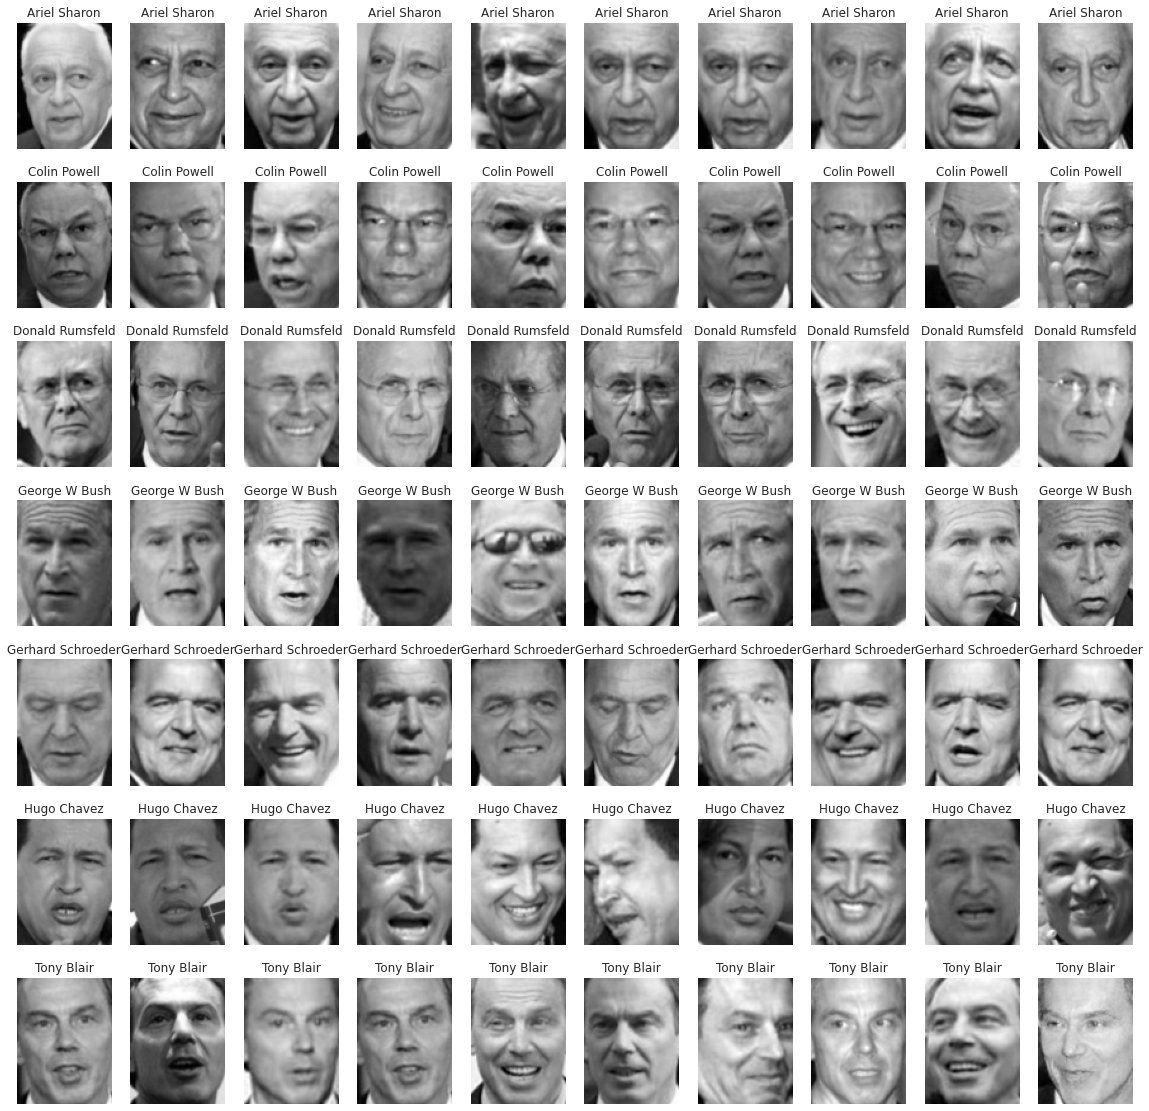

In [ ]:
# Đoạn code vẽ hình này hơi phức tạp, các em nếu đọc không hiểu có thể bỏ qua
import matplotlib.pyplot as plt

fig, axs = plt.subplots(7, 10, figsize=(20,20))
for row in range(7):
  for col in range(10):
    random_index = np.random.choice(np.where(y == row)[0])
    axs[row][col].grid('off')
    axs[row][col].axis('off')
    axs[row][col].imshow(x[random_index].reshape(h,w), cmap='gray')
    axs[row][col].set_title(target_names[row])
plt.show()

### Train Test Split

**Train Set**

Là một tập dữ liệu có kích thước lớn, được dùng để huấn luyện mô hình AI. Nôm na dễ hiểu là, đây chính là tập dữ liệu mô hình dùng để học và rút trích được những đặc điểm quan trọng để ghi nhớ lại. 

**Test Set**

Là tập dữ liệu dùng để kiểm tra độ hiệu quả của mô hình AI sau khi đã học xong. Cũng giống như con người, sau mỗi khóa học bạn phải có một bài kiểm tra cuối kì để lấy kết quả và nội dung của bài kiểm tra này là bí mật. Tương tự mô hình AI trong quá trình huấn luyện sẽ không được tiếp xúc với Test Set, sau khi huấn luyện xong ta chạy mô hình trên toàn bộ Test Set và xem độ hiệu quả của mô hình trên Test Set có chấp nhận được không. 

**Các tham số cần truyền vào hàm train_test_split trong sklearn**
- ``x, y`` là bộ dữ liệu
- ``test_size`` phần trăm dữ liệu tách ra để làm Test Set
- ``shuffle=True`` xáo trộn thứ tự dữ liệu trước khi tách
- ``random_state=42`` tương tự với ``random seed`` đã được học, giúp cho kết quả của mỗi lần tách dữ liệu là như nhau

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=42)

print('Shape of x train:', x_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of x test:', x_test.shape)
print('Shape of y test:', y_test.shape)

Shape of x train: (1030, 7500)
Shape of y train: (1030,)
Shape of x test: (258, 7500)
Shape of y test: (258,)


### Áp dụng PCA

**Ôn tập PCA**

- PCA trích xuất bộ mẫu cho xấp xỉ của bộ dữ liệu tốt nhất (tổng sai số bình phương nhỏ nhất) khi sử dụng $k$ thành phần chính đầu tiên, với bất cứ số mẫu $k$ nào.
- Các thành phần chính là các mẫu toàn cục (trích xuất trên toàn bộ dataset), không phải các chi tiết cục bộ.

**Lưu ý**
- Sau khi áp dụng ``train_test_split``, để dùng ``StandardScaler`` hoặc ``PCA`` ta cần phải
  - Khởi tạo StandardScaler / PCA và **gọi hàm fit trên Train Set (x_train)**
  - **Gọi hàm transform trên cả Train Set (x_train) và Test Set (x_test)**
- Tóm gọn lại là ta fit trên Train Set và transform trên cả 2 Set (không fit trên Test Set)

#### TODO 2
- Áp dụng PCA lên dữ liệu sao cho **lượng thông tin được giữ lại là 99%**
  - Import ``StandardScaler``
  - Khởi tạo ``StandardScaler`` và fit trên ``x_train``
  - Transform ``x_train``, đặt tên biến là ``x_train_scaled``
  - Transform ``x_test``, đặt tên biến là ``x_test_scaled``
  - Import ``PCA``
  - Khởi tạo ``PCA`` và fit trên ``x_train_scaled``
  - Transform ``x_train_scaled``, đặt tên biến là ``x_train_pca``
  - Transform ``x_test_scaled``, đặt tên biến là ``x_test_pca``


In [ ]:
### YOUR SOLUTION
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

from sklearn.decomposition import PCA
pca = PCA(0.99)
pca.fit(x_train_scaled)
x_train_pca = pca.transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled) 

### Phân tích

Chạy cell code này để in ra số lượng thành phần chính được sử dụng để giữ lại 99% lượng thông tin.

In [ ]:
print('Number of components used:', pca.n_components_)
print('Shape of x_train_pca:', x_train_pca.shape)

Number of components used: 464
Shape of x_train_pca: (1030, 464)


Ta có thể lấy ra khuôn mặt trung bình trong bộ dữ liệu bằng lệnh ``pca.mean_``

In [ ]:
mean_face = pca.mean_


**Lưu ý**

Giá trị hợp lệ của mỗi điểm ảnh trong 1 tấm hình thuộc 1 trong 2 trường hợp
- Nếu kiểu dữ liệu là **int**: mỗi điểm ảnh sẽ có giá trị trong khoảng [0, 255]
- Nếu kiểu dữ liệu là **float**: mỗi điểm ảnh sẽ có giá trị trong khoảng [0, 1]

Do việc áp dụng StandardScaler làm cho giá trị điểm ảnh không còn thuộc 1 trong 2 khoảng trên, nên ta sẽ không thể in tấm hình đó ra nữa.


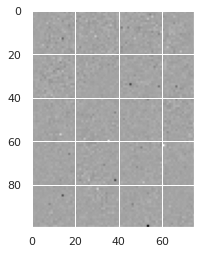

In [ ]:
# thử vẽ tấm hình trung bình vừa lấy ra
plt.imshow(mean_face.reshape(h,w), cmap='gray')

Ta có thể đảo ngược quá trình Standardize bằng lệnh ``scaler.inverse_transform(data_need_to_be_inversed)``

**Công thức Standardize**
$$
x_\text{scaled} = \frac{x - \text{mean}(x)}{\text{standard deviation}(x)}
$$

**Công thức đảo ngược**
$$
x_\text{inverse} = x_\text{scaled} \times \text{standard deviation}(x) + \text{mean}(x)
$$







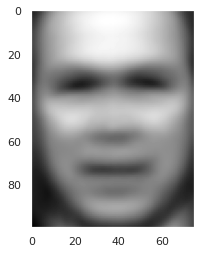

In [ ]:
# đảo ngược quá trình Standardize
mean_face_inverse = scaler.inverse_transform(mean_face.reshape(1, -1))
# thử in ra tấm hình lại 
plt.imshow(mean_face_inverse.reshape(h,w), cmap='gray')
plt.grid(None) 
plt.show()

**In ra 50 khuôn mặt thành phần chính đầu tiên**

Ta có thể lấy ra các thành phần chính bằng lệnh ``pca.components_[index]``

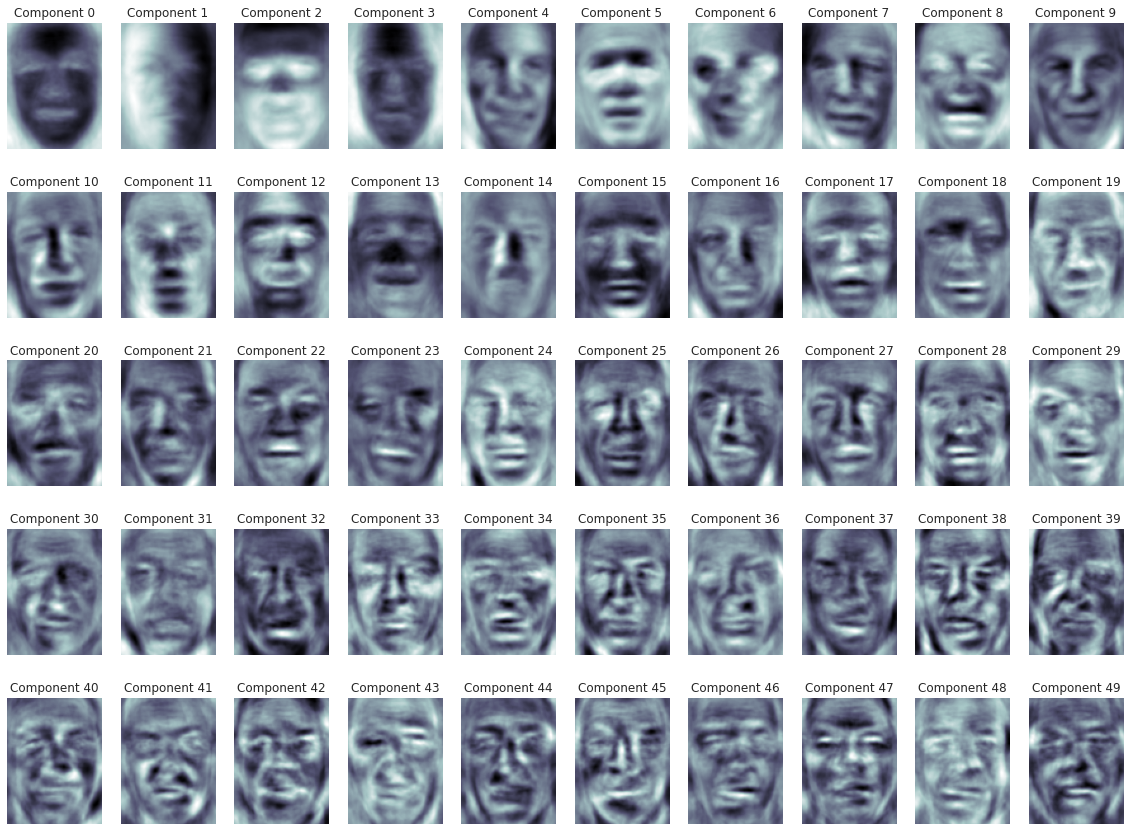

In [ ]:
fig, axes = plt.subplots(5, 10, figsize=(20, 15))
for i, ax in enumerate(axes.flat):
  ax.grid('off')
  ax.axis('off')
  ax.imshow(pca.components_[i].reshape(h,w), cmap='bone')
  ax.set_title('Component {}'.format(i))

**Tái tạo lại khuôn mặt gốc bằng các thành phần chính**

Ta dùng lệnh ``pca.inverse_transform(data_pca)`` để tái tạo lại dữ liệu gốc từ dữ liệu pca (tức là tái tạo lại tấm ảnh gốc bằng cách dùng 464 thành phần chính thôi) 

In [ ]:
# Dùng hàm pca.inverse_transform để tái tạo lại ảnh
x_train_reconstruct = pca.inverse_transform(x_train_pca)
# Đảo ngược quá trình Standardize
x_train_reconstruct = scaler.inverse_transform(x_train_reconstruct)

**Ta in ra các khuôn mặt được tái tạo để so sánh với các khuôn mặt gốc**

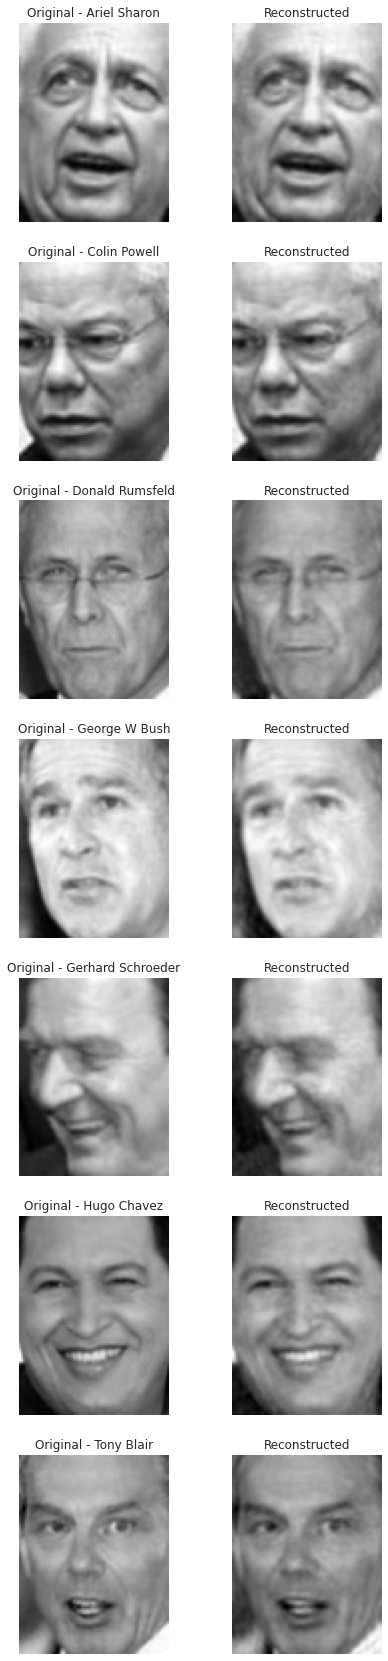

In [ ]:
fig, axs = plt.subplots(7, 2, figsize=(7, 30))

for i in range(7):
  random_index = np.random.choice(np.where(y_train == i)[0])
  axs[i][0].grid('off')
  axs[i][0].axis('off')
  axs[i][1].grid('off')
  axs[i][1].axis('off')
  axs[i][0].set_title('Original - '+target_names[i])
  axs[i][1].set_title('Reconstructed')
  axs[i][0].imshow(x_train[random_index].reshape(h,w), cmap='gray')
  axs[i][1].imshow(x_train_reconstruct[random_index].reshape(h,w), cmap='gray')
  


Ta thấy rằng chất lượng giữa ảnh gốc và ảnh được tái tạo có sự khác biệt. Tuy nhiên liệu những khác biệt này có ảnh hưởng đến việc phân loại các khuôn mặt hay không?



### Phân loại các khuôn mặt

Ở phần này ta sẽ huấn luyện mô hình ``K-Nearest Neighbors`` để phân loại xem các tấm ảnh thuộc về người nào.




#### TODO 3
- Huấn luyện mô hình K-NN để phân loại khuôn mặt trên bộ dữ liệu đã được PCA
  - **Optional:** Ở đây các em có thể tự làm thêm phần training trên các bộ dữ liệu khác (dữ liệu gốc, dữ liệu mới standardize) với cùng số neighbor rồi so sánh Accuracy cũng như tốc độ chạy với kết quả bên trên
- Gọi hàm ``score`` để xem Accuracy trên Train Set và Test Set
  ```
  print('Accuracy on Train Set',model.score(x_train_pca, y_train))
  print('Accuracy on Test Set',model.score(x_test_pca, y_test))
  ```

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time
start_time = time.time()
# Viết code để tạo + fit mô hình ở đây
model = KNeighborsClassifier()
model.fit(x_train_pca, y_train)
print("score: {}".format(model.score(x_train_pca, y_train)))
end_time = time.time()
print("Running time:", end_time-start_time)

score: 0.7417475728155339
Running time: 0.15409374237060547


Ta thấy rằng thời gian huấn luyện trên dữ liệu PCA nhanh hơn đáng kể thời gian huấn luyện trên bộ dữ liệu gốc và kết quả Accuracy là gần tương đương nhau

Lý do là ở dữ liệu gốc, mỗi tấm hình có 7500 đặc trưng còn ở dữ liệu PCA ta đã dùng PCA để trích xuất đặc trưng và mỗi tấm hình chỉ được biểu diễn bằng 464 thành phần chính

**Ta dùng hàm predict() để lấy kết quả dự đoán của mô hình trên Test Set**

In [ ]:
y_pred = model.predict(x_test_pca)

**Ta in ra 1 vài kết quả dự đoán của mô hình trên Test Set**

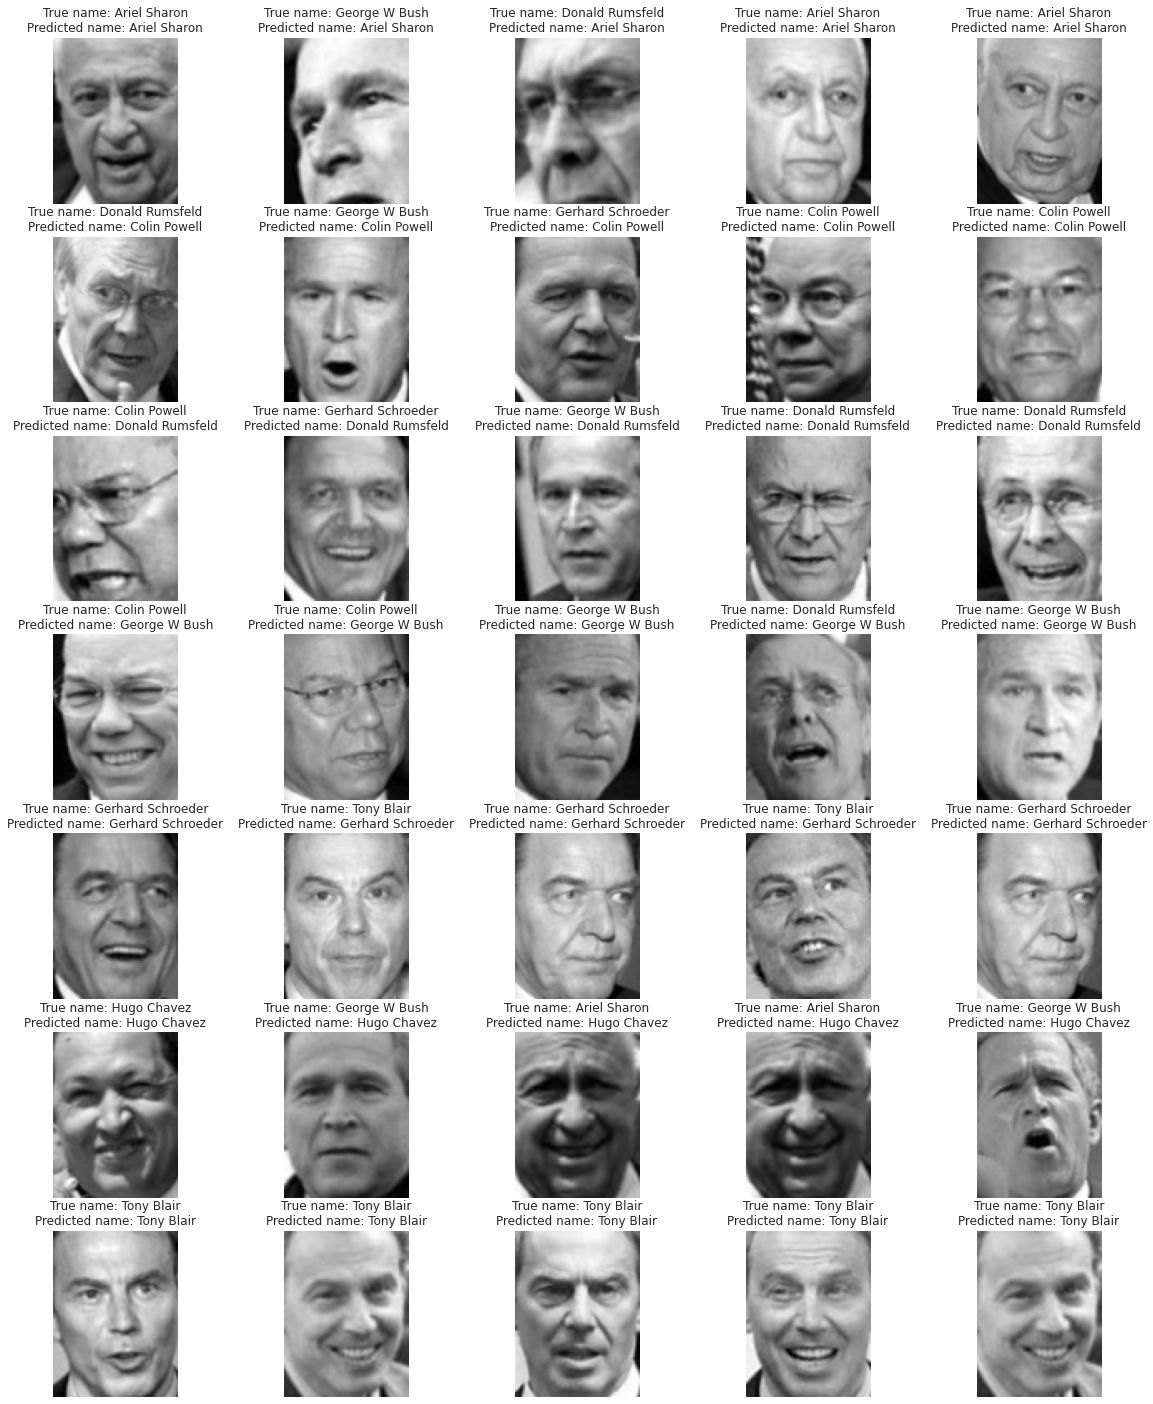

In [ ]:
np.random.seed(0)

fig, axs = plt.subplots(7, 5, figsize=(20,25))
for row in range(7):
  for col in range(5):
    random_index = np.random.choice(np.where(y_pred == row)[0])
    axs[row][col].grid('off')
    axs[row][col].axis('off')
    axs[row][col].imshow(x_test[random_index].reshape(h,w), cmap='gray')
    ax_name = 'True name: {}\nPredicted name: {}'.format(target_names[y_test[random_index]], target_names[y_pred[random_index]])
    axs[row][col].set_title(ax_name)
plt.show()